In [3]:
import pandas
import configparser
import psycopg2

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [5]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [4]:
sql = "select * from student"

In [5]:
df = pandas.read_sql_query(sql,conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [25]:
sql ="""
        select professor.p_name, course.c_name
        from professor
        inner join course
        on professor.p_email = course.p_email
        
"""

In [26]:
df = pandas.read_sql_query(sql,conn)

df[:] 

,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


In [31]:
sql = """select count(*) as num_stu, c_number
from enroll
group by c_number"""

<AxesSubplot:xlabel='c_number'>

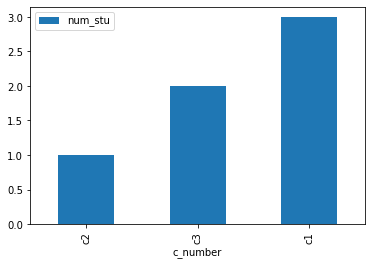

In [32]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='c_number',y='num_stu')

In [33]:
sql ="""
        select professor.p_name, count(*) as num_courses
        from professor
        inner join course
        on professor.p_email = course.p_email
        group by professor.p_name
        
"""
    

<AxesSubplot:xlabel='p_name'>

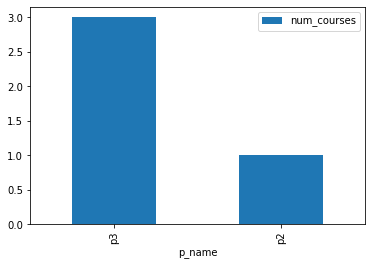

In [34]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='p_name',y='num_courses')

In [35]:
sql = """
        insert into professor (p_name, p_email, office)
        values('{}','{}','{}')
        """.format('p4','p4@jmu.edu','o4')

print(sql)


        insert into professor (p_name, p_email, office)
        values('p4','p4@jmu.edu','o4')
        


In [37]:
cur=conn.cursor()

In [38]:
cur.execute(sql)

In [39]:
conn.commit()

In [40]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [44]:
sql = """
        insert into course (c_number, c_name, room, p_email)
        values('{}','{}','{}','{}')
        """.format('c5','linkedin','r2','p4@jmu.edu')

print(sql)


        insert into course (c_number, c_name, room, p_email)
        values('c5','linkedin','r2','p4@jmu.edu')
        


In [48]:
cur=conn.cursor()

In [49]:
cur.execute(sql)

In [50]:
conn.commit()

In [51]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [13]:
sql = """
        update course
        set p_email = 'p4@jmu.edu'
        WHERE p_email = 'p2@jmu.edu'
        """
print(sql)
        


        update course
        set p_email = 'p4@jmu.edu'
        WHERE p_email = 'p2@jmu.edu'
        


In [14]:
cur=conn.cursor()

In [15]:
cur.execute(sql)

In [16]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [17]:
sql = """
        delete from professor 
        where p_email = 'p2@jmu.edu' 
        """
print(sql)


        delete from professor 
        where p_email = 'p2@jmu.edu' 
        


In [18]:
cur=conn.cursor()

In [19]:
cur.execute(sql)

In [20]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


In [21]:
cur.close()
conn.close()